# Exercise 5 : Classification Tree

# Problem 1 : Predicting CentralAir using SalePrice

Download the Kaggle dataset “train.csv” from NTU Learn, posted corresponding to this Example Class.

Import the complete dataset “train.csv” in Jupyter, as houseData = pd.read_csv('train.csv')

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


a) Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N.

Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship.

You may also want to check the mutual relationship by plotting the two variables using a swarmplot.

In [12]:
centralair = pd.DataFrame(houseData['CentralAir'])  # Response

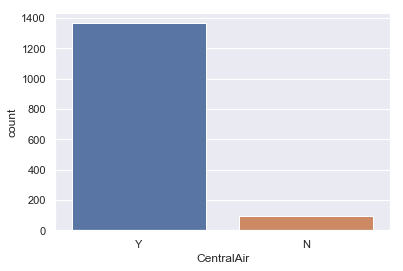

In [13]:
sb.countplot(houseData["CentralAir"])

In [14]:
saleprice = pd.DataFrame(houseData['SalePrice'])      # Predictor

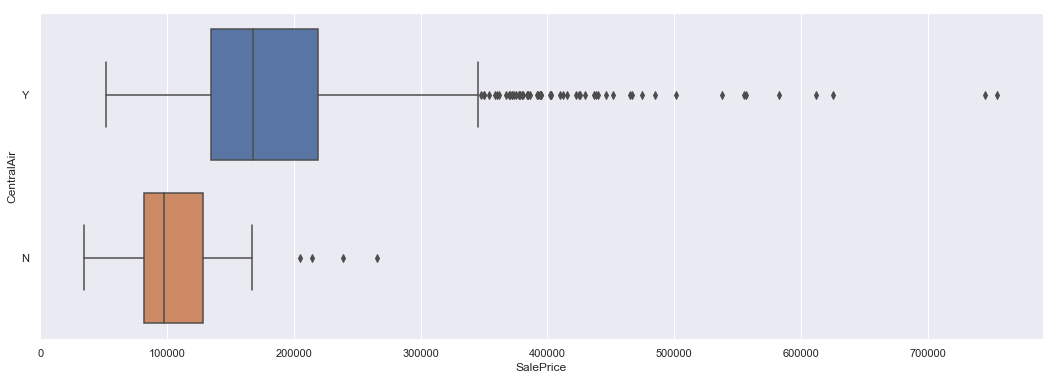

In [16]:
# Create a joint dataframe by concatenating Sale Price and Central Air
jointDF = pd.concat([saleprice, centralair], axis = 1, join_axes = [saleprice.index])

# Joint Boxplot of Sale Price against Central Air
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

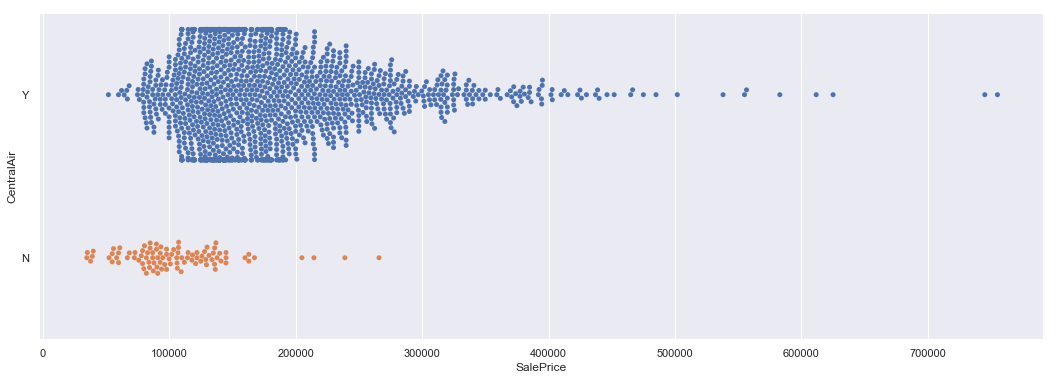

In [17]:
# Create a joint dataframe by concatenating Sale Price and Central Air
jointDF = pd.concat([saleprice, centralair], axis = 1, join_axes = [saleprice.index])

# Joint Swarmplot of Sale Price against Central Air
f, axes = plt.subplots(1, 1, figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = jointDF, orient = "h")

b) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [18]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

c) Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).

In [21]:
# Train Set : 1100 samples
houseData_train = pd.DataFrame(houseData[:1100])

# Test Set : 360 samples
houseData_test = pd.DataFrame(houseData[-360:])

# Check the sample sizes
print("Train Set :", houseData_train.shape)
print("Test Set  :", houseData_test.shape)

Train Set : (1100, 81)
Test Set  : (360, 81)


d) Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables. 

y_train = pd.DataFrame(houseData_train['CentralAir'])

X_train = pd.DataFrame(houseData_train['SalePrice'])


In [24]:
y_train = pd.DataFrame(houseData_train['CentralAir'])
x_train = pd.DataFrame(houseData_train['SalePrice'])

# Train the Decision Tree Classifier model
dectree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = x_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

e) Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).

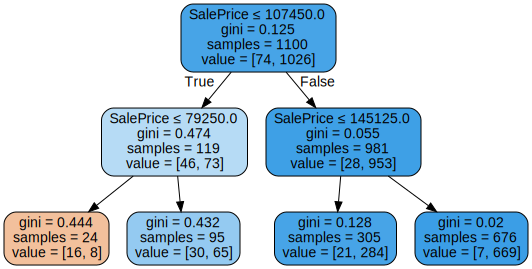

In [29]:
# Render using graphviz
import graphviz
graphviz.Source(treedot)

f) Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

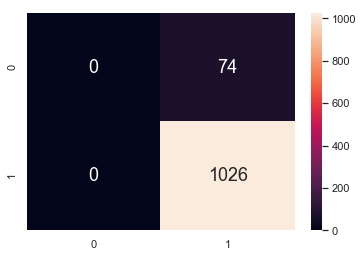

In [46]:
# Predict Central Air corresponding to Sale Price Train
y_train_pred = dectree.predict(x_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

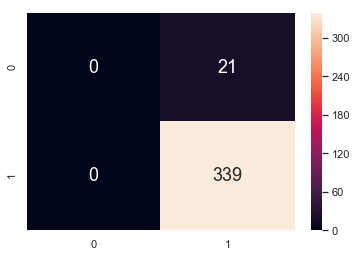

In [47]:
y_test = pd.DataFrame(houseData_test['CentralAir'])
x_test = pd.DataFrame(houseData_test['SalePrice'])

# Predict Central Air corresponding to Sale Price Test
y_test_pred = dectree.predict(x_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

g) Discuss with your Friends all the accuracy parameters of the decision tree model,

including its Classification
Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate.

In [45]:
#Measurements
#Classificiation Accuracy TN+TP/Total

print("Classification Accuracy in Train Data:", dectree.score(x_train, y_train))
print("Classification Accuracy in Test Data:", dectree.score(x_test, y_test))

#True Positive Rate
tpr_train = 1018/(1018+8)
tpr_test = 336/(336+3)

print("True Positive Rate in Train Data = ", tpr_train)
print("True Positive Rate in Test Data = ", tpr_test)

#True Negative Rate
tnr_train = 16/(16+58)
tnr_test = 5/(5+16)

print("True Negative Rate in Train Data = ", tnr_train)
print("True Negative Rate in Test Data = ", tnr_test)

Classification Accuracy in Train Data: 0.9327272727272727
Classification Accuracy in Test Data: 0.9416666666666667
True Positive Rate in Train Data =  0.9922027290448343
True Positive Rate in Test Data =  0.9911504424778761
True Negative Rate in Train Data =  0.21621621621621623
True Negative Rate in Test Data =  0.23809523809523808


In [40]:
#False Positive Rate
fpr_train = 58/(16+58)
fpr_test = 16/(16+5)

print("False Positive Rate in Train Data = ", fpr_train)
print("False Positive Rate in Test Data = ", fpr_test)

#False Negative Rate
fnr_train = 8/(8+1018)
fnr_test = 3/(3+336)

print("False Negative Rate in Train Data = ", fnr_train)
print("False Negative Rate in Test Data = ", fnr_test)

False Positive Rate in Train Data =  0.7837837837837838
False Positive Rate in Test Data =  0.7619047619047619
False Negative Rate in Train Data =  0.007797270955165692
False Negative Rate in Test Data =  0.008849557522123894


# Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on 'CentralAir' against each of the variables 'GrLivArea', 'LotArea', 'TotalBsmtSF'
one-by-one to obtain individual Decision Trees.

Discuss with your Friends about the models, compare the Classification
Accuracy, check the True Positives and False Positives, and determine which model is the best to predict 'CentralAir'.

In [62]:
grlivarea_train = pd.DataFrame(houseData_train['GrLivArea'])
lotarea_train = pd.DataFrame(houseData_train['LotArea'])
totalbsmtsf_train = pd.DataFrame(houseData_train['TotalBsmtSF'])

grlivarea_test = pd.DataFrame(houseData_test['GrLivArea'])
lotarea_test = pd.DataFrame(houseData_test['LotArea'])
totalbsmtsf_test = pd.DataFrame(houseData_test['TotalBsmtSF'])

# GrLivArea 

In [63]:
# Train the Decision Tree Classifier model
dectree.fit(grlivarea_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

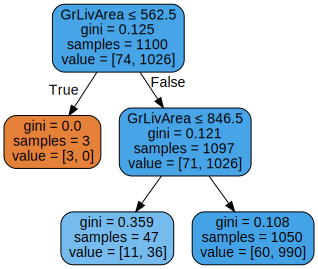

In [64]:
# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = grlivarea_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

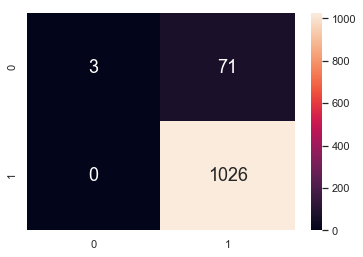

In [65]:
# Predict Central Air corresponding to Gr Liv Area Test
y_train_pred = dectree.predict(grlivarea_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

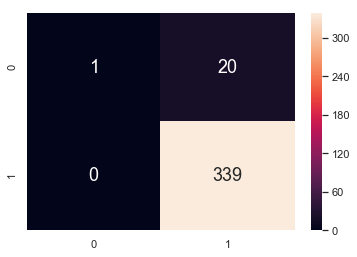

In [66]:
# Predict Central Air corresponding to Gr Liv Area Test
y_test_pred = dectree.predict(grlivarea_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [67]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(grlivarea_test, y_test))

#True Positive Rate
tpr_train = 1026/(1026+0)
tpr_test = 339/(339+0)

print("True Positive Rate in Train Data = ", tpr_train)
print("True Positive Rate in Test Data = ", tpr_test)

#False Positive Rate
fpr_train = 71/(71+3)
fpr_test = 20/(20+1)

print("False Positive Rate in Train Data = ", fpr_train)
print("False Positive Rate in Test Data = ", fpr_test)

Classification Accuracy 	: 0.9444444444444444
True Positive Rate in Train Data =  1.0
True Positive Rate in Test Data =  1.0
False Positive Rate in Train Data =  0.9594594594594594
False Positive Rate in Test Data =  0.9523809523809523


# LotArea

In [68]:
# Train the Decision Tree Classifier model
dectree.fit(lotarea_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

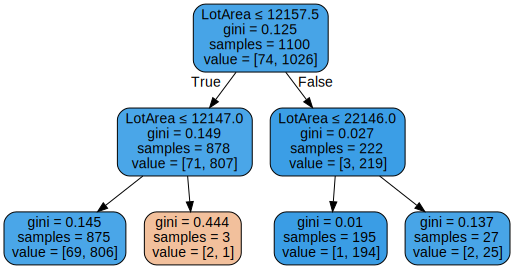

In [69]:
# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = lotarea_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

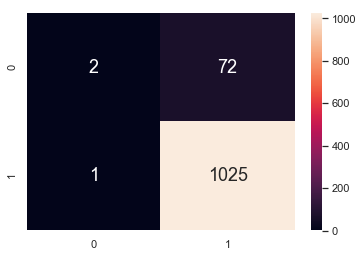

In [70]:
# Predict Central Air corresponding to Lot Area Test
y_train_pred = dectree.predict(lotarea_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

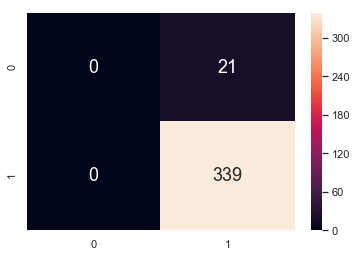

In [71]:
# Predict Central Air corresponding to Lot Area Test
y_test_pred = dectree.predict(lotarea_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [72]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(lotarea_test, y_test))

#True Positive Rate
tpr_train = 1025/(1025+1)
tpr_test = 339/(339+0)

print("True Positive Rate in Train Data = ", tpr_train)
print("True Positive Rate in Test Data = ", tpr_test)

#False Positive Rate
fpr_train = 72/(72+2)
fpr_test = 21/(21+0)

print("False Positive Rate in Train Data = ", fpr_train)
print("False Positive Rate in Test Data = ", fpr_test)

Classification Accuracy 	: 0.9416666666666667
True Positive Rate in Train Data =  0.9990253411306043
True Positive Rate in Test Data =  1.0
False Positive Rate in Train Data =  0.972972972972973
False Positive Rate in Test Data =  1.0


# TotalBsmtSF

In [73]:
# Train the Decision Tree Classifier model
dectree.fit(totalbsmtsf_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

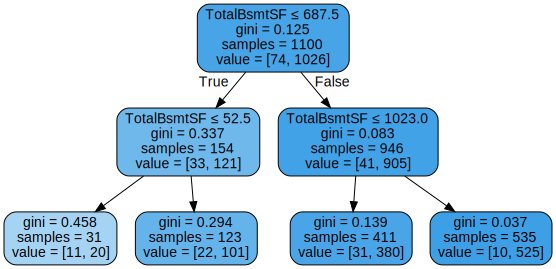

In [74]:
# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = totalbsmtsf_train.columns,          # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

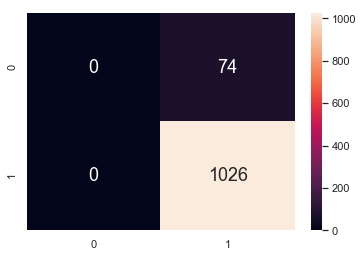

In [76]:
# Predict Central Air corresponding to Total BSMTSF Test
y_train_pred = dectree.predict(totalbsmtsf_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

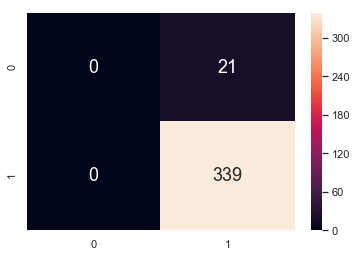

In [77]:
# Predict Central Air corresponding to Total BSMTSF Test
y_test_pred = dectree.predict(totalbsmtsf_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [78]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(totalbsmtsf_test, y_test))

#True Positive Rate
tpr_train = 1026/(1026+0)
tpr_test = 339/(339+0)

print("True Positive Rate in Train Data = ", tpr_train)
print("True Positive Rate in Test Data = ", tpr_test)

#False Positive Rate
fpr_train = 74/(74+0)
fpr_test = 21/(21+0)

print("False Positive Rate in Train Data = ", fpr_train)
print("False Positive Rate in Test Data = ", fpr_test)

Classification Accuracy 	: 0.9416666666666667
True Positive Rate in Train Data =  1.0
True Positive Rate in Test Data =  1.0
False Positive Rate in Train Data =  1.0
False Positive Rate in Test Data =  1.0


Total BSMTSF is the best model to predict Central Air.